In [60]:
#Importing Libraries

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [61]:
Data=pd.read_csv('customer_churn_large_dataset.csv')

In [91]:
Data

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_encoded,Location_encoded
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,1,2
1,2,Customer_2,62,Female,New York,1,48.76,172,0,0,4
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,0,2
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,0,3
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1,1,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0,0,4
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1,1,0
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1,0,4


In [62]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [63]:
Data.shape

(100000, 9)

In [64]:
#Data cleaning

Data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [65]:
Data.duplicated().sum()

0

In [66]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,100000.0,50000.500000,28867.657797,1.0,25000.75,50000.50,75000.25,100000.0
Age,100000.0,44.027020,15.280283,18.0,31.00,44.00,57.00,70.0
Subscription_Length_Months,100000.0,12.490100,6.926461,1.0,6.00,12.00,19.00,24.0
Monthly_Bill,100000.0,65.053197,20.230696,30.0,47.54,65.01,82.64,100.0
Total_Usage_GB,100000.0,274.393650,130.463063,50.0,161.00,274.00,387.00,500.0
Churn,100000.0,0.497790,0.499998,0.0,0.00,0.00,1.00,1.0


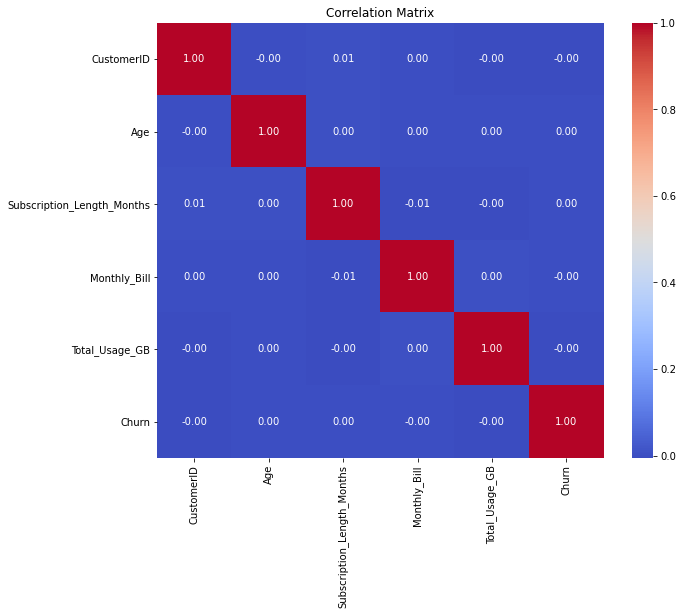

In [67]:
#Correlation Matrix

corr_matrix = Data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [68]:
#  function to handle outliers using IQR

def handle_outliers_iqr(data, column, lower_bound, upper_bound, method='remove'):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    
    if method == 'remove':
        # Remove outliers
        data = data[(data[column] >= Q1 - lower_bound * IQR) & (data[column] <= Q3 + upper_bound * IQR)]
    elif method == 'winsorize':
        # Winsorize outliers by replacing them with the nearest non-outlier values
        data[column] = np.where(data[column] < Q1 - lower_bound * IQR, Q1 - lower_bound * IQR, data[column])
        data[column] = np.where(data[column] > Q3 + upper_bound * IQR, Q3 + upper_bound * IQR, data[column])
    
    return data

# lower and upper bounds for the IQR method
lower_bound = 1.5
upper_bound = 1.5

# Specify the column in which you want to handle outliers
column_to_handle = 'Monthly_Bill'

# Choose the method to handle outliers ('remove' or 'winsorize')
method_to_use = 'remove'

# Handle outliers
Data = handle_outliers_iqr(Data, column_to_handle, lower_bound, upper_bound, method_to_use)


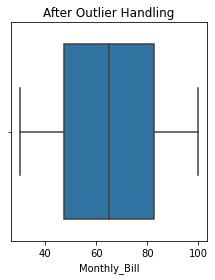

In [69]:
# Visualize of data after handling outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=Data[column_to_handle])
plt.title('After Outlier Handling')

plt.tight_layout()
plt.show()

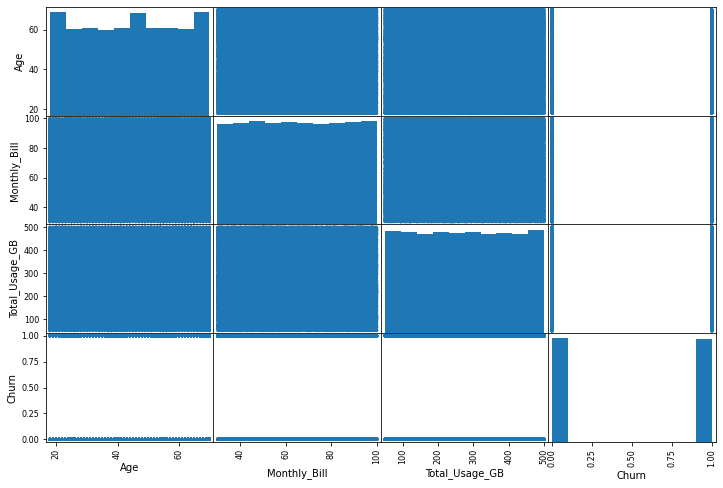

In [70]:
#Scatter matrix plot

from pandas.plotting import scatter_matrix
scatter_matrix(Data[['Age', 'Monthly_Bill', 'Total_Usage_GB', 'Churn']], figsize=(12, 8), diagonal='hist')
plt.show()

In [71]:
#ENCODING CATEGORICAL VARIABLES

from sklearn.preprocessing import LabelEncoder
L_Encoder=LabelEncoder()
Data['Gender_encoded'] = L_Encoder.fit_transform(Data['Gender'])
Data['Location_encoded'] = L_Encoder.fit_transform(Data['Location'])
print(Data[['CustomerID', 'Name', 'Age', 'Gender_encoded', 'Location_encoded']])
Data

       CustomerID             Name  Age  Gender_encoded  Location_encoded
0               1       Customer_1   63               1                 2
1               2       Customer_2   62               0                 4
2               3       Customer_3   24               0                 2
3               4       Customer_4   36               0                 3
4               5       Customer_5   46               0                 3
...           ...              ...  ...             ...               ...
99995       99996   Customer_99996   33               1                 1
99996       99997   Customer_99997   62               0                 4
99997       99998   Customer_99998   64               1                 0
99998       99999   Customer_99999   51               0                 4
99999      100000  Customer_100000   27               0                 2

[100000 rows x 5 columns]


,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_encoded,Location_encoded
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,1,2
1,2,Customer_2,62,Female,New York,1,48.76,172,0,0,4
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,0,2
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,0,3
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1,1,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0,0,4
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1,1,0
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1,0,4


In [72]:
Data['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [87]:
# the customer with the highest subscription length
customer_with_highest_subscription = Data.loc[Data['Subscription_Length_Months'].idxmax()]

# Print the customer's information
print("Customer with Highest Subscription Length:")
print(customer_with_highest_subscription[['Name', 'Subscription_Length_Months']])


Customer with Highest Subscription Length:
Name                          Customer_54
Subscription_Length_Months             24
Name: 53, dtype: object


In [89]:
# Count the number of males and females
gender_counts = Data['Gender'].value_counts()

male_count = gender_counts['Male']
female_count = gender_counts['Female']

# Print the counts and ratio
print("Number of Males:", male_count)
print("Number of Females:", female_count)


Number of Males: 49784
Number of Females: 50216


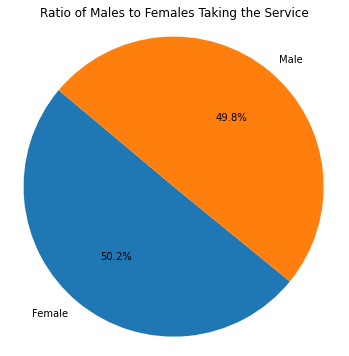

In [90]:
# Visulizing with pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Ratio of Males to Females Taking the Service')

plt.axis('equal')
plt.show()


In [73]:
#Split data in test and train set

X=Data[['Age', 'Gender_encoded', 'Location_encoded', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']]
Y=Data[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Scaling the values

from sklearn.preprocessing import StandardScaler
S_scaler = StandardScaler()
X_train=S_scaler.fit_transform(X_train)
X_test=S_scaler.fit_transform(X_test)

# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (80000, 6)
X_test shape: (20000, 6)
y_train shape: (80000, 1)
y_test shape: (20000, 1)


In [74]:
print(X)

       Age  Gender_encoded  Location_encoded  Subscription_Length_Months  \
0       63               1                 2                          17   
1       62               0                 4                           1   
2       24               0                 2                           5   
3       36               0                 3                           3   
4       46               0                 3                          19   
...    ...             ...               ...                         ...   
99995   33               1                 1                          23   
99996   62               0                 4                          19   
99997   64               1                 0                          17   
99998   51               0                 4                          20   
99999   27               0                 2                          19   

       Monthly_Bill  Total_Usage_GB  
0             73.36             236  
1          

In [75]:
print(Y)

       Churn
0          0
1          0
2          0
3          1
4          0
...      ...
99995      1
99996      0
99997      1
99998      1
99999      1

[100000 rows x 1 columns]


In [76]:
#Model Building

Model= LogisticRegression()

In [77]:
Model.fit(X_train,y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [78]:
#Accuracy of X traning model prediction

X_train_prediction=Model.predict(X_train)
Trainning_accuracy=accuracy_score(X_train_prediction,y_train)

In [79]:
Trainning_accuracy

0.5040125

In [80]:
#Accuracy of X test model prediction 

X_test_prediction=Model.predict(X_test)
Test_accuracy=accuracy_score(X_test_prediction,y_test)
Test_accuracy

0.50185

In [81]:
#Tuning the model performance

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
# Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
}

# Create GridSearchCV to find the best hyperparameters using cross-validation
grid_search = GridSearchCV(Model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification_rep)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [      nan 0.50275         nan 0.5026875       nan 0.5026625       nan
 0.50265         nan 0.50265         nan 0.50265  ]
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}

Accuracy: 0.50315

Confusion Matrix:
 [[6313 3766]
 [6171 3750]]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.63      0.56     10079
           1       0.50      0.38      0.43      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.50     20000



In [82]:
#Model deployment

input_data=[36,3,97.94,297,0,3]
input_data_numpy_array=np.asarray(input_data)

input_data_reshape=input_data_numpy_array.reshape(1,-1)
prediction=Model.predict(input_data_reshape)
prediction

if(prediction[0]==0):
    print("THE CUSTOMER HAS STOPPED USING SERVICE")
else:
    print("THE CUSTOMER IS CONNECTED WITH SERVICE")


THE CUSTOMER IS CONNECTED WITH SERVICE
